# EDA : Lok Sabha Candidates, 2014 

## Extracting data

In [1]:
import pandas as pd
from urllib.request import urlopen
from bs4 import BeautifulSoup
from tabulate import tabulate

year = 2014


def inr_to_int(text):
    try:
        text = text.split()
        text = text[1].replace(",", "")
    except:
        return 0
    return int(text)


def main():
    header = ["Candidate", "Party", "Criminal Cases", "Education", "Age", "Constituency",  "Total Assets", "Liabilities"]
    data = []
    constituencies = 0
    candidates = 0
    for i in range(1, 575):
        try:
            print("Trying ID", i, end = ' => ')
            url = "https://myneta.info/ls" + str(year) + "/index.php?action=show_candidates&constituency_id=" + str(i)
            html = urlopen(url)
            soup = BeautifulSoup(html,'html.parser')
            title = soup.title.text
            title = title.split()
            title = title[4:-2]
            title = " ".join(title)
            title = title.title()
            title = title.split(":")
            constituency = "+".join(title)
            title = ",".join(title)
            print("Saving", title, end = ' => ')
            table = soup.find("table", {"id": "table1"})
            rows = table.find_all('tr')
            total_rows = len(rows)
            for i in range(1, total_rows):
                col_data = []
                cols = rows[i].find_all('td')
                total_cols = len(cols)
                for i in range(0, 5):
                    col_data.append(cols[i].text)
                col_data.append(constituency)
                for i in range(5, total_cols):
                    col_data.append(inr_to_int(cols[i].text))                        
                data.append(col_data)
                candidates += 1
        except :
            print('ERROR')
        else:
            constituencies += 1
            print('SUCCESS')
    df = pd.DataFrame(data = data, columns = header)
    print('Saved =>', candidates, "candidates from", constituencies, "constituencies")
    df.to_csv(str(year) + '.csv', index=False)
    

main()

Trying ID 1 => Saving Adilabad , Telangana => SUCCESS
Trying ID 2 => Saving Peddapalle , Telangana => SUCCESS
Trying ID 3 => Saving Karimnagar , Telangana => SUCCESS
Trying ID 4 => Saving Nizamabad , Telangana => SUCCESS
Trying ID 5 => Saving Zahirabad , Telangana => SUCCESS
Trying ID 6 => Saving Medak , Telangana => SUCCESS
Trying ID 7 => Saving Malkajgiri , Telangana => SUCCESS
Trying ID 8 => Saving Secunderabad , Telangana => SUCCESS
Trying ID 9 => Saving Hyderabad , Telangana => SUCCESS
Trying ID 10 => Saving Chevella , Telangana => SUCCESS
Trying ID 11 => Saving Mahbubnagar , Telangana => SUCCESS
Trying ID 12 => Saving Nagarkurnool , Telangana => SUCCESS
Trying ID 13 => Saving Nalgonda , Telangana => SUCCESS
Trying ID 14 => Saving Bhongir , Telangana => SUCCESS
Trying ID 15 => Saving Warangal , Telangana => SUCCESS
Trying ID 16 => Saving Mahabubabad , Telangana => SUCCESS
Trying ID 17 => Saving Khammam , Telangana => SUCCESS
Trying ID 18 => Saving Araku , Andhra Pradesh => SUCCESS

Trying ID 146 => Saving Eluru , Andhra Pradesh => SUCCESS
Trying ID 147 => Saving Machilipatnam , Andhra Pradesh => SUCCESS
Trying ID 148 => Saving Vijayawada , Andhra Pradesh => SUCCESS
Trying ID 149 => Saving Guntur , Andhra Pradesh => SUCCESS
Trying ID 150 => Saving Narasaraopet , Andhra Pradesh => SUCCESS
Trying ID 151 => Saving Bapatla , Andhra Pradesh => SUCCESS
Trying ID 152 => Saving Ongole , Andhra Pradesh => SUCCESS
Trying ID 153 => Saving Nandyal , Andhra Pradesh => SUCCESS
Trying ID 154 => Saving Kurnool , Andhra Pradesh => SUCCESS
Trying ID 155 => Saving Anantapur , Andhra Pradesh => SUCCESS
Trying ID 156 => Saving Hindupur , Andhra Pradesh => SUCCESS
Trying ID 157 => Saving Kadapa , Andhra Pradesh => SUCCESS
Trying ID 158 => Saving Nellore , Andhra Pradesh => SUCCESS
Trying ID 159 => Saving Tirupati , Andhra Pradesh => SUCCESS
Trying ID 160 => Saving Rajampet , Andhra Pradesh => SUCCESS
Trying ID 161 => Saving Chittoor , Andhra Pradesh => SUCCESS
Trying ID 162 => Saving D

Trying ID 291 => Saving Valsad , Gujarat => SUCCESS
Trying ID 292 => Saving Bagalkot , Karnataka => SUCCESS
Trying ID 293 => Saving Haveri , Karnataka => SUCCESS
Trying ID 294 => Saving Dharwad , Karnataka => SUCCESS
Trying ID 295 => Saving Davanagere , Karnataka => SUCCESS
Trying ID 296 => Saving Shimoga , Karnataka => SUCCESS
Trying ID 297 => Saving Udupi Chikmagalur , Karnataka => SUCCESS
Trying ID 298 => Saving Hassan , Karnataka => SUCCESS
Trying ID 299 => Saving Dakshina Kannada , Karnataka => SUCCESS
Trying ID 300 => Saving Mandya , Karnataka => SUCCESS
Trying ID 301 => Saving Mysore , Karnataka => SUCCESS
Trying ID 302 => Saving Chamarajanagar , Karnataka => SUCCESS
Trying ID 303 => Saving Supaul , Bihar => SUCCESS
Trying ID 304 => Saving Araria , Bihar => SUCCESS
Trying ID 305 => Saving Kishanganj , Bihar => SUCCESS
Trying ID 306 => Saving Katihar , Bihar => SUCCESS
Trying ID 307 => Saving Purnia , Bihar => SUCCESS
Trying ID 308 => Saving Madhepura , Bihar => SUCCESS
Trying ID

Trying ID 433 => Saving Kannauj , Uttar Pradesh => SUCCESS
Trying ID 434 => Saving Jangipur , West Bengal => SUCCESS
Trying ID 435 => Saving Baharampur , West Bengal => SUCCESS
Trying ID 436 => Saving Murshidabad , West Bengal => SUCCESS
Trying ID 437 => Saving Krishnanagar , West Bengal => SUCCESS
Trying ID 438 => Saving Ranaghat , West Bengal => SUCCESS
Trying ID 439 => Saving Howrah , West Bengal => SUCCESS
Trying ID 440 => Saving Uluberia , West Bengal => SUCCESS
Trying ID 441 => Saving Sreerampur , West Bengal => SUCCESS
Trying ID 442 => Saving Hooghly , West Bengal => SUCCESS
Trying ID 443 => Saving Arambag , West Bengal => SUCCESS
Trying ID 444 => Saving Tamluk , West Bengal => SUCCESS
Trying ID 445 => Saving Kanthi , West Bengal => SUCCESS
Trying ID 446 => Saving Bardhaman Purba , West Bengal => SUCCESS
Trying ID 447 => Saving Bardhaman Durgapur , West Bengal => SUCCESS
Trying ID 448 => Saving Asansol , West Bengal => SUCCESS
Trying ID 449 => Saving Bolpur , West Bengal => SUCC

Trying ID 561 => Saving Amritsar , Bye- Election On 04-02-2017 , Punjab => SUCCESS
Trying ID 562 => Saving Alwar , Bye Election On 29-01-2018 , Rajasthan => SUCCESS
Trying ID 563 => Saving Ajmer , Bye Election On 29-01-2018 , Rajasthan => SUCCESS
Trying ID 564 => Saving Uluberia , Bye Election On 29-01-2018 , West Bengal => SUCCESS
Trying ID 565 => Saving Araria , Bye Election On 11-03-2018 , Bihar => SUCCESS
Trying ID 566 => Saving Phulpur , Bye Election On 11-03-2018 , Uttar Pradesh => SUCCESS
Trying ID 567 => Saving Gorakhpur , Bye Election On 11-03-2018 , Uttar Pradesh => SUCCESS
Trying ID 568 => Saving Bhandara-Gondiya , Bye Election On 28-05-2018 , Maharashtra => SUCCESS
Trying ID 569 => Saving Palghar , Bye Election On 28-05-2018 , Maharashtra => SUCCESS
Trying ID 570 => Saving Nagaland , Bye Election On 28-05-2018 , Nagaland => SUCCESS
Trying ID 571 => Saving Kairana , Bye Election On 28-05-2018 , Uttar Pradesh => SUCCESS
Trying ID 572 => Saving Bellary , Bye Election On 03-11-

## Visualizing data

In [2]:
import pandas as pd
import numpy as np
import matplotlib

%matplotlib inline

matplotlib.rc('figure', figsize=(10, 5))
matplotlib.rc('font', weight='bold', size=12)

In [3]:
data = pd.read_csv(str(year) + '.csv')
data

Candidate  Party  Criminal Cases  \
0            Godam Nagesh   Winner     TRS               0   
1                     Banka Sahadev    IND               1   
2                  Mosali Chinnaiah    IND               0   
3                            Naresh    INC               0   
4                  Nethawath Ramdas    IND               0   
...                             ...    ...             ...   
8479                   Y.pampapathi    IND               0   
8480      B.y.raghavendra   Winner     BJP               2   
8481  L.r.shivarame Gowda   Winner   JD(S)               5   
8482                    K.s.rajanna    IND               0   
8483             Nandish Kumara K B    IND               0   

                  Education  Age  \
0             Post Graduate   49   
1                  Graduate   53   
2                 12th Pass   40   
3                 Doctorate   37   
4                Illiterate   44   
...                     ...  ...   
8479              12th Pass   60   
8480  Graduate Professional   45   
8481              12th Pass   62   
8482              10th Pass   59   
8483              12th Pass   32   

                                          Constituency  Total Assets  \
0                                 Adilabad + Telangana      10378857   
1                                 Adilabad + Telangana        393000   
2                                 Adilabad + Telangana       3167000   
3                                 Adilabad + Telangana       1800000   
4                                 Adilabad + Telangana             0   
...                                                ...           ...   
8479  Bellary + Bye Election On 03-11-2018 + Karnataka       2760000   
8480  Shimoga + Bye Election On 03-11-2018 + Karnataka     588903795   
8481   Mandya + Bye Election On 03-11-2018 + Karnataka     983129191   
8482   Mandya + Bye Election On 03-11-2018 + Karnataka      42396540   
8483   Mandya + Bye Election On 03-11-2018 + Karnataka             0   

      Liabilities  
0          148784  
1               0  
2           40000  
3               0  
4               0  
...           ...  
8479            0  
8480     13350647  
8481      5339531  
8482      2400000  
8483            0  

[8484 rows x 8 columns]

In [4]:
data.describe()

Criminal Cases          Age  Total Assets   Liabilities
count     8484.000000  8484.000000  8.484000e+03  8.484000e+03
mean         0.550684    46.762023  4.958916e+07  3.950880e+06
std          6.147574    12.681485  9.194760e+08  4.117516e+07
min          0.000000     0.000000  0.000000e+00  0.000000e+00
25%          0.000000    38.000000  4.453750e+05  0.000000e+00
50%          0.000000    46.000000  2.458440e+06  0.000000e+00
75%          0.000000    56.000000  1.151615e+07  4.000000e+05
max        382.000000    93.000000  7.710296e+10  2.218003e+09

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8484 entries, 0 to 8483
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Candidate       8484 non-null   object
 1   Party           8484 non-null   object
 2   Criminal Cases  8484 non-null   int64 
 3   Education       8484 non-null   object
 4   Age             8484 non-null   int64 
 5   Constituency    8484 non-null   object
 6   Total Assets    8484 non-null   int64 
 7   Liabilities     8484 non-null   int64 
dtypes: int64(4), object(4)
memory usage: 530.4+ KB


In [6]:
# Total number of Parties
np.size(data["Party"].unique()) - 1
# Reducing by one for independent candidates

512

In [7]:
candidates = np.size(data["Candidate"])
candidates

8484

In [8]:
candidates - np.size(data["Candidate"].unique())

352

In [9]:
candidates - data.groupby(['Candidate', 'Party']).ngroups

115

In [10]:
candidates - data.groupby(['Candidate', 'Constituency']).ngroups

10

In [11]:
data.groupby(['Candidate', 'Education'])['Total Assets'].sum().sort_values(ascending=False).head(25)

Candidate                              Education            
Nandan Nilekani                        Graduate Professional    77102957219
Shamali Das                            8th Pass                 40000120000
Anil Kumar Sharma                      Doctorate                 8498803720
Swaran Salaria                         12th Pass                 7308956418
Jayadev Galla   Winner                 Graduate                  6830581361
Ayodhya Rami Reddy Alla                Post Graduate             6543381756
Konda Vishweshwar Reddy   Winner       Post Graduate             5286230210
Nama Nageswara Rao                     12th Pass                 3382293440
Naveen Jindal                          Post Graduate             3083154000
Moni Kumar Subba                       8th Pass                  3067535137
Malook Nagar                           Graduate                  2896200000
Gokaraju Ganga Raju   Winner           Graduate                  2883567122
Vasantha Kumar H.          

In [12]:
data.groupby(['Candidate', 'Education'])['Liabilities'].sum().sort_values(ascending=False).head(25)

Candidate                                           Education            
R. Prabhakara Reddy                                 Graduate                 2218003086
Moni Kumar Subba                                    8th Pass                 1400740132
Anil Kumar Sharma                                   Doctorate                1095393904
Vasantha Kumar H.                                   Post Graduate             876085097
H D Kumara Swamy                                    Graduate                  729603654
Srinivas Kesineni   Winner                          10th Pass                 715462989
Nand Gopal Gupta Nandi                              10th Pass                 642055000
Jain Manish Ishwarlal                               Graduate                  606612400
Ayodhya Rami Reddy Alla                             Post Graduate             604035456
Sri Praksh Jha                                      12th Pass                 552293138
Balashowry Vallabhaneni                       

In [13]:
party_data = data[data["Party"].isin(["AAP","SAD","BSP","BJP","INC","IND","Republican Party of India (A)", "Punjab Lok Congress Party"])]
party_data.reset_index()
party_data

Candidate Party  Criminal Cases              Education  \
1                 Banka Sahadev   IND               1               Graduate   
2              Mosali Chinnaiah   IND               0              12th Pass   
3                        Naresh   INC               0              Doctorate   
4              Nethawath Ramdas   IND               0             Illiterate   
5                 Pawar Krishna   IND               1          Post Graduate   
...                         ...   ...             ...                    ...   
8478                  J.shantha   BJP               0              12th Pass   
8479               Y.pampapathi   IND               0              12th Pass   
8480  B.y.raghavendra   Winner    BJP               2  Graduate Professional   
8482                K.s.rajanna   IND               0              10th Pass   
8483         Nandish Kumara K B   IND               0              12th Pass   

      Age                                      Constituency  Total Assets  \
1      53                              Adilabad + Telangana        393000   
2      40                              Adilabad + Telangana       3167000   
3      37                              Adilabad + Telangana       1800000   
4      44                              Adilabad + Telangana             0   
5      33                              Adilabad + Telangana             0   
...   ...                                               ...           ...   
8478   46  Bellary + Bye Election On 03-11-2018 + Karnataka      49272747   
8479   60  Bellary + Bye Election On 03-11-2018 + Karnataka       2760000   
8480   45  Shimoga + Bye Election On 03-11-2018 + Karnataka     588903795   
8482   59   Mandya + Bye Election On 03-11-2018 + Karnataka      42396540   
8483   32   Mandya + Bye Election On 03-11-2018 + Karnataka             0   

      Liabilities  
1               0  
2           40000  
3               0  
4               0  
5               0  
...           ...  
8478      1751785  
8479            0  
8480     13350647  
8482      2400000  
8483            0  

[5216 rows x 8 columns]

In [14]:
party_sorted = party_data[["Party","Candidate"]].groupby(["Party"]).aggregate(lambda x: len(x.unique())).sort_values(["Candidate"], ascending = False )
party_sorted

Candidate
Party           
IND         3248
BSP          498
INC          484
BJP          446
AAP          429
SAD           10

<AxesSubplot:xlabel='Party'>

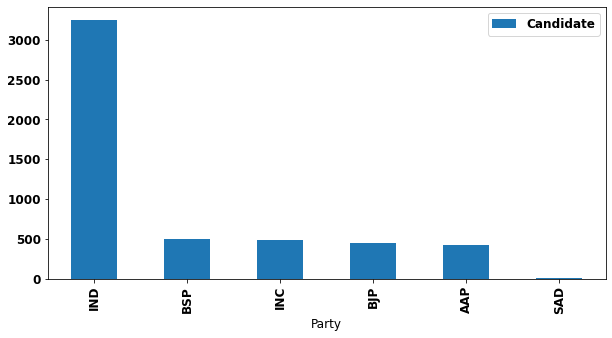

In [15]:
party_sorted.plot(kind="bar")

<AxesSubplot:xlabel='Education'>

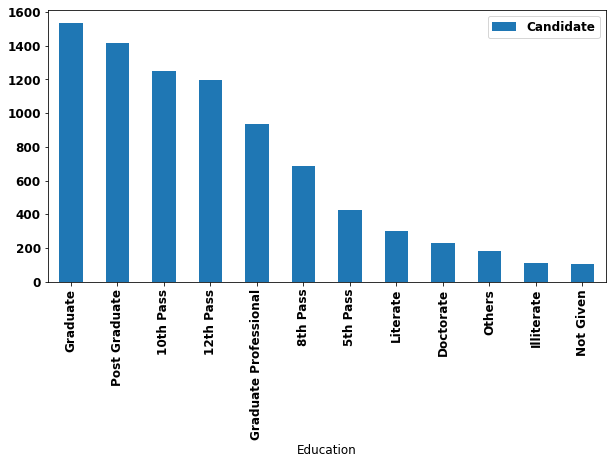

In [16]:
ed_data = pd.pivot_table(data,values=["Candidate"],aggfunc=lambda x: len(x.unique()), index=["Education"]).sort_values(["Candidate"], ascending = False )
ed_data.reset_index()
ed_data.plot(kind="bar")

In [17]:
ed_party_data = pd.pivot_table(party_data, values=["Candidate"],aggfunc=lambda x: len(x.unique()), index=["Education"], columns=["Party"])
ed_party_data.fillna(0)

Candidate                                
Party                       AAP    BJP   BSP    INC    IND  SAD
Education                                                      
10th Pass                  33.0   44.0  79.0   25.0  618.0  3.0
12th Pass                  33.0   50.0  78.0   47.0  511.0  1.0
5th Pass                    2.0    7.0  20.0    3.0  255.0  0.0
8th Pass                    7.0    8.0  43.0    7.0  378.0  1.0
Doctorate                  25.0   31.0  11.0   34.0   44.0  0.0
Graduate                   81.0  111.0  83.0  120.0  501.0  2.0
Graduate Professional      77.0   85.0  58.0   95.0  260.0  1.0
Illiterate                  0.0    0.0   6.0    0.0   66.0  0.0
Literate                    1.0    3.0  17.0    2.0  156.0  0.0
Not Given                   5.0    0.0   0.0    1.0   62.0  0.0
Others                     16.0    9.0  14.0    6.0   72.0  0.0
Post Graduate             150.0   99.0  92.0  145.0  392.0  2.0

In [18]:
criminal_data_asc = data[["Candidate","Constituency","Party", "Education","Criminal Cases"]].sort_values('Criminal Cases', ascending=False).head(25)
criminal_data_asc = criminal_data_asc.reset_index(drop=True)
criminal_data_asc

Candidate  \
0                                     Udayakumar S.p.   
1                                       M.pushparayan   
2                                 Sridip Bhattacharya   
3                                          Atiq Ahmad   
4                                    Kameshwar Baitha   
5                                          Atiq Ahmad   
6                                        Pawan Pandey   
7                                        Nepal Mahata   
8             Rajesh Ranjan Urf Pappu Yadav   Winner    
9   Shrimant Chh. Udayanraje Pratapsinha Bhonsale ...   
10                                        Dadan Yadav   
11                          Amrishbhai Rasiklal Patel   
12                                Pradeep Kumar Joshi   
13                  Dr. Ramshankar Katheria   Winner    
14                                    Muruganantham.m   
15                                        Arvind Giri   
16                             Narendra Ambalal Ravat   
17                            Bhapkar Maruti Sahebrao   
18                               Jitendra Kumar Singh   
19                       Vasava Kishorbhai Chhotubhai   
20                                     Mitrasen Yadav   
21                   Adhir Ranjan Chowdhury   Winner    
22                                      Keshwar Yadav   
23             Gandhi Dilipkumar Mansukhlal   Winner    
24                                    Narahari Mahato   

                                         Constituency             Party  \
0                          Kanniyakumari + Tamil Nadu               AAP   
1                           Thoothukkudi + Tamil Nadu               AAP   
2                                Howrah + West Bengal            CPI(M)   
3   Phulpur + Bye Election On 11-03-2018 + Uttar P...               IND   
4                                 Palamau + Jharkhand              AITC   
5                           Shrawasti + Uttar Pradesh                SP   
6                           Sultanpur + Uttar Pradesh               BSP   
7                               Purulia + West Bengal               INC   
8                                   Madhepura + Bihar               RJD   
9                                Satara + Maharashtra               NCP   
10                                      Buxar + Bihar               BSP   
11                                Dhule + Maharashtra               INC   
12                                    Karakat + Bihar  Rashtra Sewa Dal   
13                               Agra + Uttar Pradesh               BJP   
14                             Thanjavur + Tamil Nadu               BJP   
15                              Kheri + Uttar Pradesh               BSP   
16    Vadodara + Bye Election On 13-09-2014 + Gujarat               INC   
17                                Maval + Maharashtra               AAP   
18                           Faizabad + Uttar Pradesh               BSP   
19                                    Surat + Gujarat             JD(U)   
20                           Faizabad + Uttar Pradesh                SP   
21                           Baharampur + West Bengal               INC   
22                                 Chatra + Jharkhand                SP   
23                           Ahmednagar + Maharashtra               BJP   
24                              Purulia + West Bengal              AIFB   

                Education  Criminal Cases  
0               Doctorate             382  
1           Post Graduate             380  
2   Graduate Professional              57  
3                8th Pass              53  
4               10th Pass              48  
5               10th Pass              42  
6               12th Pass              32  
7           Post Graduate              25  
8                Graduate              24  
9               12th Pass              23  
10              10th Pass              22  
11               8th Pass              21  
12              12th Pass             

In [19]:
criminal_data_dsc = data[["Candidate","Constituency","Party", "Education","Criminal Cases"]].sort_values('Criminal Cases', ascending=True).head(25)
criminal_data_dsc = criminal_data_dsc.reset_index(drop=True)
criminal_data_dsc

Candidate           Constituency  \
0        Godam Nagesh   Winner    Adilabad + Telangana   
1           Dr. Rajesh Mahendia        Hisar + Haryana   
2                  Balwan Singh        Hisar + Haryana   
3                       Baljeet        Hisar + Haryana   
4                  Atam Parkash        Hisar + Haryana   
5                    Arun Kumar        Hisar + Haryana   
6   Dushyant Chautala   Winner         Hisar + Haryana   
7                Surender Kumar        Sirsa + Haryana   
8                 Ranvir Khobra        Sirsa + Haryana   
9                  Rajbir Palna        Sirsa + Haryana   
10              Raj Kumar Nagar        Sirsa + Haryana   
11                 Poonam Chand        Sirsa + Haryana   
12                   Mewa Singh        Sirsa + Haryana   
13    Dr. Yudhbir Singh Khyalia        Hisar + Haryana   
14                Manjeet Singh        Sirsa + Haryana   
15                Jaipal Bhatti        Sirsa + Haryana   
16                      Jagdish        Sirsa + Haryana   
17                Hansraj Hansa        Sirsa + Haryana   
18                  Fakir Chand        Sirsa + Haryana   
19            Dr. Sushil Indora        Sirsa + Haryana   
20            Comrade Ram Kumar        Sirsa + Haryana   
21                Balwant Singh        Sirsa + Haryana   
22   Charanjeet Singh   Winner         Sirsa + Haryana   
23          Satish Kumar Singal  Kurukshetra + Haryana   
24          Ranbir Singh Sharma  Kurukshetra + Haryana   

                       Party              Education  Criminal Cases  
0                        TRS          Post Graduate               0  
1                        IND              Doctorate               0  
2                        IND              12th Pass               0  
3                        IND               Graduate               0  
4                        IND          Post Graduate               0  
5                        IND              12th Pass               0  
6                       INLD               Graduate               0  
7                        IND              12th Pass               0  
8                        IND               Graduate               0  
9                        IND          Post Graduate               0  
10                        SP               Graduate               0  
11                       AAP              12th Pass               0  
12                       IND               5th Pass               0  
13                       AAP              Doctorate               0  
14                       IND               5th Pass               0  
15                       IND               5th Pass               0  
16                       IND               Graduate               0  
17                Jan Morcha              12th Pass               0  
18                       IND               8th Pass               0  
19                   HJC(BL)  Graduate Professional               0  
20                    CPI(M)              12th Pass               0  
21  Bharatiya Sant Mat Party              10th Pass               0  
22                      INLD              10th Pass               0  
23                       IND          Post Graduate               0  
24                       IND  Graduate Professional               0

<AxesSubplot:xlabel='Party'>

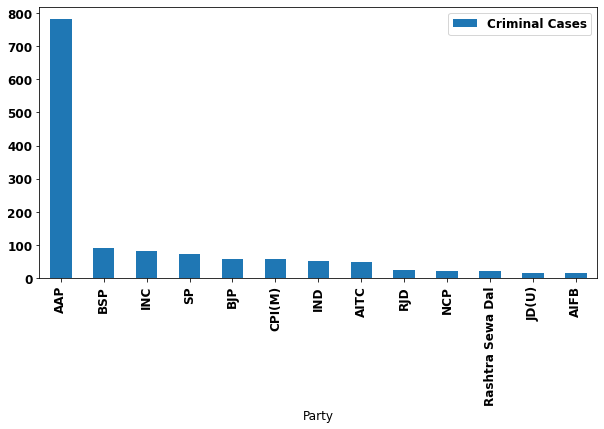

In [20]:
criminal_data_asc.groupby("Party").aggregate(np.sum).sort_values("Criminal Cases",ascending=False).head(25).plot(kind='bar') 

In [21]:
asset_data = data[["Candidate","Constituency","Party", "Total Assets"]].sort_values('Total Assets', ascending=False).head(25)
asset_data = asset_data.reset_index(drop=True)
asset_data

Candidate  \
0                         Nandan Nilekani   
1                             Shamali Das   
2                             Shamali Das   
3                       Anil Kumar Sharma   
4                          Swaran Salaria   
5                 Jayadev Galla   Winner    
6                 Ayodhya Rami Reddy Alla   
7       Konda Vishweshwar Reddy   Winner    
8                      Nama Nageswara Rao   
9                           Naveen Jindal   
10                       Moni Kumar Subba   
11                           Malook Nagar   
12          Gokaraju Ganga Raju   Winner    
13                      Vasantha Kumar H.   
14                   Dr.gaddam Vivekanand   
15                  Vakati Narayana Reddy   
16                 Butta Renuka   Winner    
17                    R. Prabhakara Reddy   
18                   Kamal Nath   Winner    
19                              M. Shahid   
20               Patel Praful Manoharbhai   
21                       V. Bala Krishnan   
22          Kanwar Singh Tanwar   Winner    
23  Deol Hema Malini Dharmendra   Winner    
24                  Narendranath Chaganla   

                                       Constituency  \
0                       Bangalore South + Karnataka   
1                     Kolkata Dakshin + West Bengal   
2                            Jadavpur + West Bengal   
3                                 Jahanabad + Bihar   
4   Gurdaspur + Bye Election On 11-10-2017 + Punjab   
5                           Guntur + Andhra Pradesh   
6                     Narasaraopet + Andhra Pradesh   
7                              Chevella + Telangana   
8                               Khammam + Telangana   
9                             Kurukshetra + Haryana   
10                                   Tezpur + Assam   
11                           Bijnor + Uttar Pradesh   
12                      Narsapuram + Andhra Pradesh   
13                       Kanniyakumari + Tamil Nadu   
14                           Peddapalle + Telangana   
15                         Nellore + Andhra Pradesh   
16                         Kurnool + Andhra Pradesh   
17                      Bangalore Rural + Karnataka   
18                      Chhindwara + Madhya Pradesh   
19                           Meerut + Uttar Pradesh   
20                   Bhandara Gondiya + Maharashtra   
21                    Bangalore Central + Karnataka   
22                           Amroha + Uttar Pradesh   
23                          Mathura + Uttar Pradesh   
24                                Medak + Telangana   

                                    Party  Total Assets  
0                                     INC   77102957219  
1                                     IND   20000060000  
2                                     IND   20000060000  
3                                   JD(U)    8498803720  
4                                     BJP    7308956418  
5                                     TDP    6830581361  
6   Yuvajana Sramika Rythu Congress Party    6543381756  
7                                     TRS    5286230210  
8                                     TDP    3382293440  
9                                     INC    3083154000  
10                                    IND    3067535137  
11                                    BSP    2896200000  
12                                    BJP    2883567122  
13                                    INC    2857786803  
14                                    INC    2665292981  
15                                    INC    2513866365  
16  Yuvajana Sramika Rythu Congress Party    2426240513  
17                                  JD(S)    2243612066  
18                                    INC    2069080434  
19                                    BSP    1989984945  
20                                    NCP    1959685779  
21                                    AAP    1894253519  
22                                    BJP    1788430770  
23                                    

<AxesSubplot:xlabel='Party'>

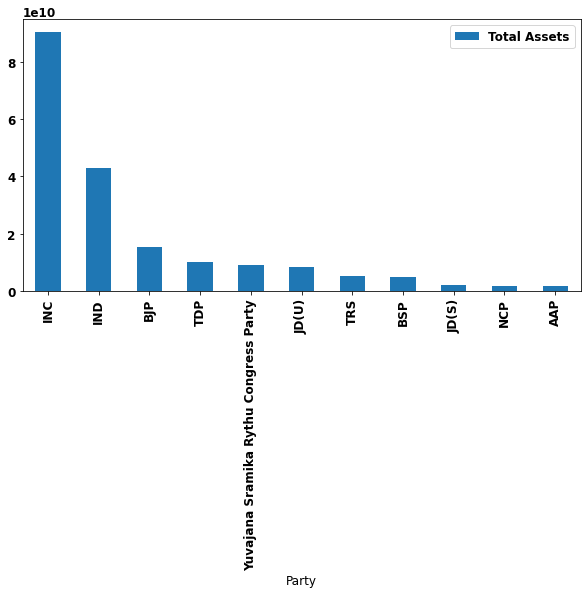

In [22]:
asset_data.groupby("Party").aggregate(np.sum).sort_values("Total Assets",ascending=False).head(25).plot(kind='bar') 